# Workshop 3: Python and IVP's

In [2]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)


Up until now, we have been relying on our own code to integrate and solve differential equations. The goal was to understand how this is done numerically. In reality, you will be using the built-in functions most of the time.
Let us try to solve some ODE's!

For a simple application of our new tool, we want to drop a ball and see how its speed and position change with time. Luckily, we know the exact solution so we will be able to check our numerics!

In the case of a free-falling object,

$$
F = m\frac{dv}{dt} = mg\rightarrow v\left(t\right) = g\int_0^t dt'\,.
$$

Similarly,

$$
x\left(t\right) = \int_0^t v\left(t'\right)dt\,.
$$

In [5]:
def RK2_step(f, x, t, epsilon):
    k1 = f(t, x)
    k2 = f(t + epsilon, x + epsilon * k1)
    return (x + epsilon * (k1 + k2) / 2)

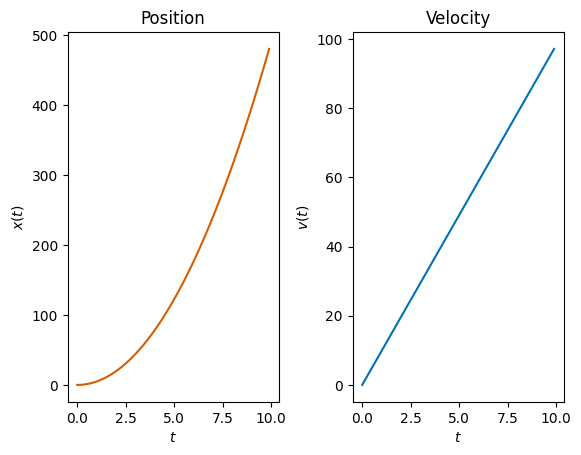

In [9]:
g = 9.81

def derivative(t, s):
    v = s[1]
    return np.array([v, g])

t_min = 0
t_max = 10
epsilon = 0.1
n_pts = int(np.floor((t_max - t_min) / epsilon))

sol = [[0, 0]] * n_pts
init = [0, 0]
sol[0] = init

for step in range(1, n_pts):
    sol[step] = RK2_step(derivative, sol[step - 1], epsilon * step, epsilon)

ts = t_min + np.arange(0, n_pts) * epsilon

fig, (ax_position, ax_velocity) = plt.subplots(1, 2)

ax_position.plot(ts, [s[0] for s in sol], color = CF_vermillion)
ax_velocity.plot(ts, [s[1] for s in sol], color = CF_blue)

ax_position.set(title = "Position", xlabel = "$t$", ylabel = "$x(t)$")
ax_velocity.set(title = "Velocity", xlabel = "$t$", ylabel = "$v(t)$")

plt.subplots_adjust(wspace = 0.35)

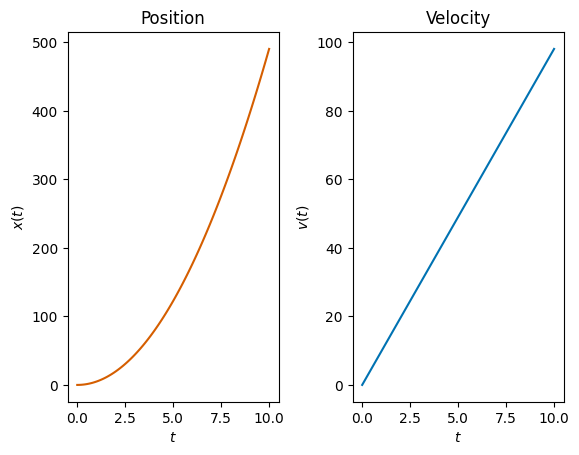

In [16]:
g = 9.81

def derivative(t, s):
    v = s[1]
    return np.array([v, g])

t_min = 0
t_max = 10
epsilon = 0.1

init = np.array([0, 0])
solution = integrate.solve_ivp(derivative, [t_min, t_max], init, max_step = epsilon)

ts = solution.t
rabbits = solution.y[0]
foxes = solution.y[1]

fig, (ax_position, ax_velocity) = plt.subplots(1, 2)

ax_position.plot(ts, rabbits, color = CF_vermillion)
ax_velocity.plot(ts, foxes, color = CF_blue)

ax_position.set(title = "Position", xlabel = "$t$", ylabel = "$x(t)$")
ax_velocity.set(title = "Velocity", xlabel = "$t$", ylabel = "$v(t)$")

plt.subplots_adjust(wspace = 0.35)

Let us now introduce an aerodynamic drag which is proportional to the speed squared:

$$
F = m\frac{dv}{dt} = mg - Av^2 \,.
$$

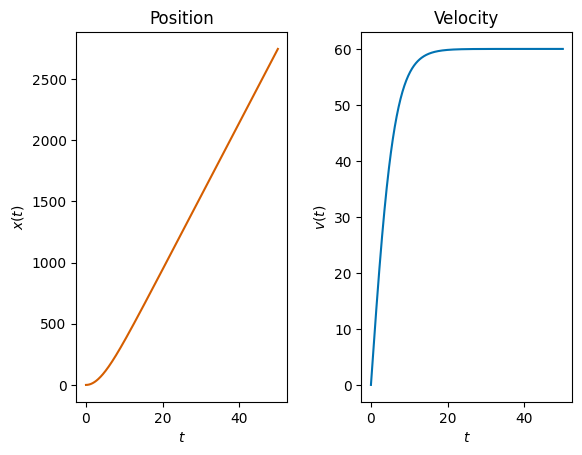

In [23]:
g = 9.81
alpha = 0.002725

def derivative(t, s):
    v = s[1]
    g_drag = g - alpha * v ** 2
    return np.array([v, g_drag])

t_min = 0
t_max = 50
epsilon = 0.1

init = np.array([0, 0])
solution = integrate.solve_ivp(derivative, [t_min, t_max], init, max_step = epsilon)

ts = solution.t
rabbits = solution.y[0]
foxes = solution.y[1]

fig, (ax_position, ax_velocity) = plt.subplots(1, 2)

ax_position.plot(ts, rabbits, color = CF_vermillion)
ax_velocity.plot(ts, foxes, color = CF_blue)

ax_position.set(title = "Position", xlabel = "$t$", ylabel = "$x(t)$")
ax_velocity.set(title = "Velocity", xlabel = "$t$", ylabel = "$v(t)$")

plt.subplots_adjust(wspace = 0.35)

### Of Rabbits and Foxes

Consider an (almost) idyllic forest populated by Rabbits and Foxes. Rabbits can do two things: eat and make more rabbits. The forest is HUGE and there is never a shortage of food. This means that the Rabbit population can grow without bound.

Foxes, on the other hand, are a bit different. They can eat Rabbits (as a stew or as Rabbit jerky) and use that energy to make more Foxes. Without Rabbits, Foxes slowly die off from hunger as they simply refuse to eat Rabbit food.

Let us try to capture this in a quantitative way. First, we deal with the Rabbits. In the absence of Foxes, the growth rate can be modeled as
$$
\frac{d}{dt}R\left(t\right) = fR\left(t\right)\,.
$$
We assume that the growth rate is proportional to the current Rabbit population via a "reproduction factor" $f$. Now, if there are also Foxes around, they tend to eat Rabbits when they eat them. The likelyhood of such an encounter is the product of the Fox and Rabbit numbers, scaled by some "lunch" factor $l$. This gives
$$
\frac{d}{dt}R\left(t\right) = fR\left(t\right) - lR\left(t\right) F\left(t\right)\,.
$$

As we said above, without Rabbits, the Foxes starve to death:
$$
\frac{d}{dt}F\left(t\right) = -sF\left(t\right)\,.
$$

If there are Rabbits running around, Foxes can invite them for dinner and grow their population:
$$
\frac{d}{dt}F\left(t\right) = -sF\left(t\right) + mF\left(t\right)R\left(t\right)\,.
$$

So, the relevant vectorial equation is
$$
\frac{d}{dt}
\begin{pmatrix}
R\left(t\right)
\\
F\left(t\right)
\end{pmatrix}
=
\begin{pmatrix}
fR\left(t\right) - lR\left(t\right)F\left(t\right)
\\
-sF\left(t\right) + mF\left(t\right)R\left(t\right)\,,
\end{pmatrix}
$$
known as the Lotka-Volterra equation.

**Your task** is to play with the parameters $f$, $l$, $s$, and $m$, as well as the starting populations to see how $R\left(t\right)$ and $F\left(t\right)$ evolve in time.



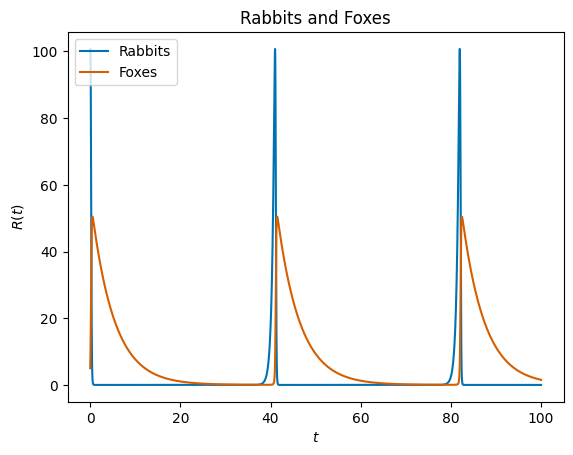

In [52]:
f = 2
l = 0.3
s = 0.2
m = 0.1

def derivative(t, state):
    d_rabbits = f * state[0] - l * state[0] * state[1]
    d_foxes = -s * state[1] + m * state[1] * state[0]
    return np.array([d_rabbits, d_foxes])

t_min = 0
t_max = 100
epsilon = 0.01

init = np.array([100, 5])
# init = np.array([s / m, f / l])
solution = integrate.solve_ivp(derivative, [t_min, t_max], init, max_step = epsilon)

ts = solution.t
rabbits = solution.y[0]
foxes = solution.y[1]

fig, ax = plt.subplots(1, 1)

ax.plot(ts, rabbits, color = CF_blue, label = "Rabbits")
ax.plot(ts, foxes, color = CF_vermillion, label = "Foxes")

ax.set(title = "Rabbits and Foxes", xlabel = "$t$", ylabel = "$R(t)$")

plt.subplots_adjust(wspace = 0.35)
plt.legend()

[Text(0.5, 1.0, 'Rabbits and Foxes'),
 Text(0.5, 0, 'rabbits'),
 Text(0, 0.5, '$foxes$')]

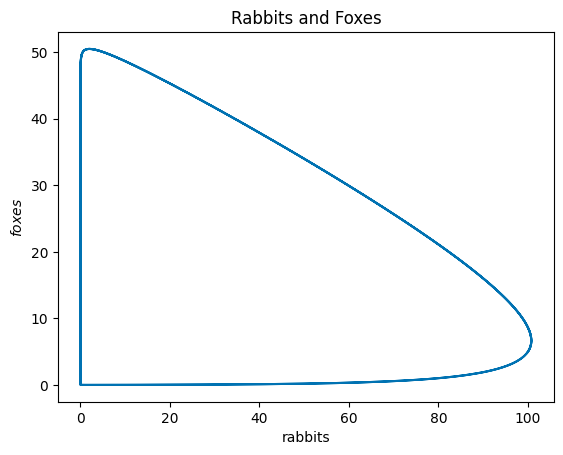

In [53]:
fig, ax = plt.subplots(1, 1)
ax.plot(rabbits, foxes, color = CF_blue)
ax.set(title = "Rabbits and Foxes", xlabel = "rabbits", ylabel = "$foxes$")

[6.66666667 2.        ]


[Text(0.5, 1.0, 'Rabbits and Foxes'),
 Text(0.5, 0, 'rabbits'),
 Text(0, 0.5, '$foxes$')]

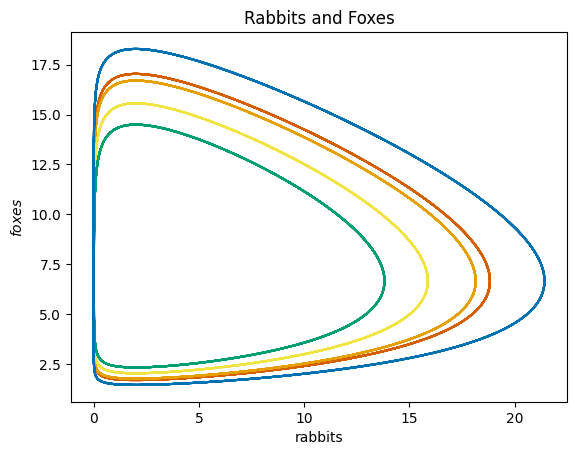

In [58]:
f = 2
l = 0.3
s = 0.2
m = 0.1

def derivative(t, state):
    d_rabbits = f * state[0] - l * state[0] * state[1]
    d_foxes = -s * state[1] + m * state[1] * state[0]
    return np.array([d_rabbits, d_foxes])

t_min = 0
t_max = 100
epsilon = 0.01

stable_init = np.array([f / l, s / m])
print(stable_init)

inits = [stable_init, stable_init + 0.1, stable_init + 0.5, stable_init + 1, stable_init + 10]
colors = [CF_vermillion, CF_orange, CF_yellow, CF_green, CF_blue]

fig, ax = plt.subplots(1, 1)

for i, init in enumerate(inits):
    solution = integrate.solve_ivp(derivative, [t_min, t_max], init, max_step = epsilon)

    ts = solution.t
    rabbits = solution.y[0]
    foxes = solution.y[1]
    
    ax.plot(rabbits, foxes, color = colors[i])

ax.set(title = "Rabbits and Foxes", xlabel = "rabbits", ylabel = "$foxes$")

/tmp/ipykernel_23519/2283052832.py:17: RuntimeWarning: invalid value encountered in divide
  u_norm = u / np.sqrt(u ** 2 + v ** 2)
/tmp/ipykernel_23519/2283052832.py:18: RuntimeWarning: invalid value encountered in divide
  v_norm = v / np.sqrt(u ** 2 + v ** 2)


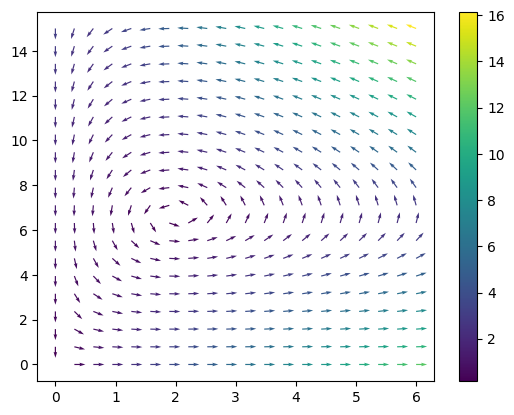

In [86]:
f = 2
l = 0.3
s = 0.2
m = 0.1

def derivative(t, state):
    d_rabbits = f * state[0] - l * state[0] * state[1]
    d_foxes = -s * state[1] + m * state[1] * state[0]
    return np.array([d_rabbits, d_foxes])

x,y = np.meshgrid(np.linspace(0, 6, 20),
                  np.linspace(0, 15, 20))

u = derivative(0, np.array([x, y]))[0]
v = derivative(0, np.array([x, y]))[1]

u_norm = u / np.sqrt(u ** 2 + v ** 2)
v_norm = v / np.sqrt(u ** 2 + v ** 2)

M = np.sqrt(u ** 2 + v ** 2)

colors = [CF_red, CF_vermillion, CF_orange, CF_yellow, CF_green, CF_sky, CF_blue]

# plt.quiver(x, y, u, v, M, color = colors)
plt.quiver(x, y, u_norm, v_norm, M, color = colors)
plt.colorbar()
plt.show()